### Importamos las librerias


In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import math as mt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Cargamos los datos preprocesados, lo procesamos y los Visualizamos

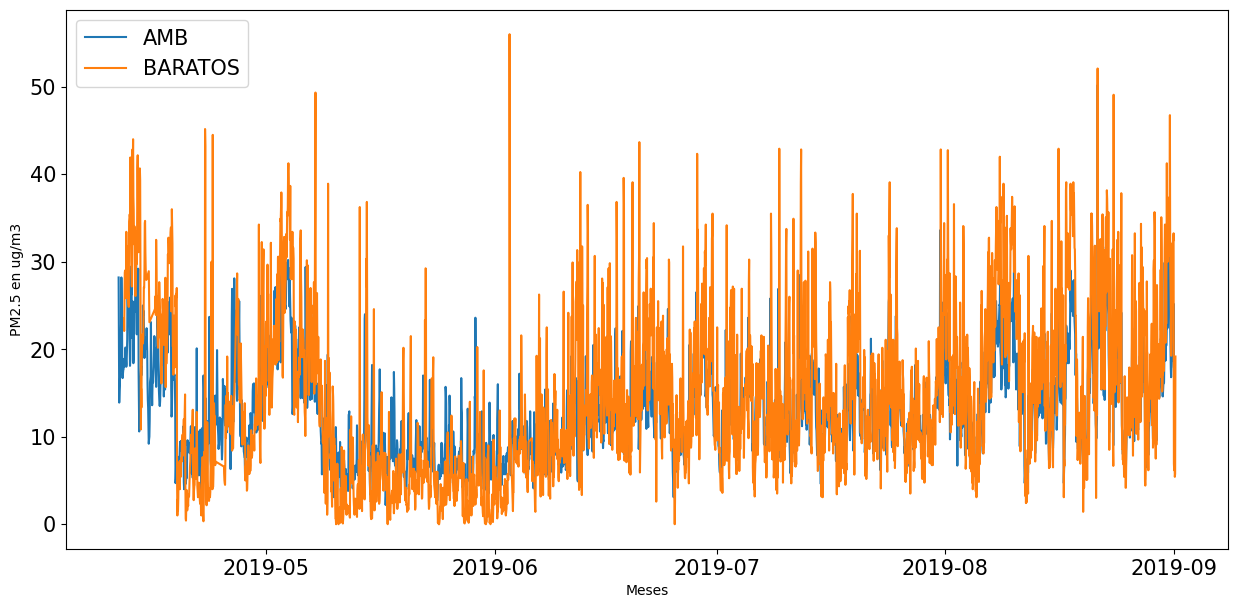

In [34]:
data = pd.read_excel('Datos AMB.xlsx')
data1 = pd.read_csv('Datos Baratos.csv',sep=",",parse_dates=['fecha_hora_med'])


# Limpieza de datos
data1 = data1.drop(['id_parametro'], axis =1)
data['Medidas'] = data['Medidas'].replace('NoData', '')

data = data.dropna()
data1 = data1.dropna()

data1['fecha_hora_med'] = pd.to_datetime(data1['fecha_hora_med'])
data['Fechas']          = pd.to_datetime(data['Fechas'])
data1 = data1.sort_values('fecha_hora_med',ascending=True)
data = data.drop_duplicates()
data1 = data1.drop_duplicates()
# Plot
plt.figure(figsize=(15,7))

DATOS_AMB = plt.plot(data['Fechas'], data['Medidas'], label='AMB')
DATOS_BAJA_CALIDAD = plt.plot(data1['fecha_hora_med'], data1['valor'], label='BARATOS')
plt.xlabel('Meses')
plt.ylabel('PM2.5 en ug/m3')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Promedio movil con varios tipos de configuraciones

#### Promedio con la ventana = 3 y con los pasos = 1

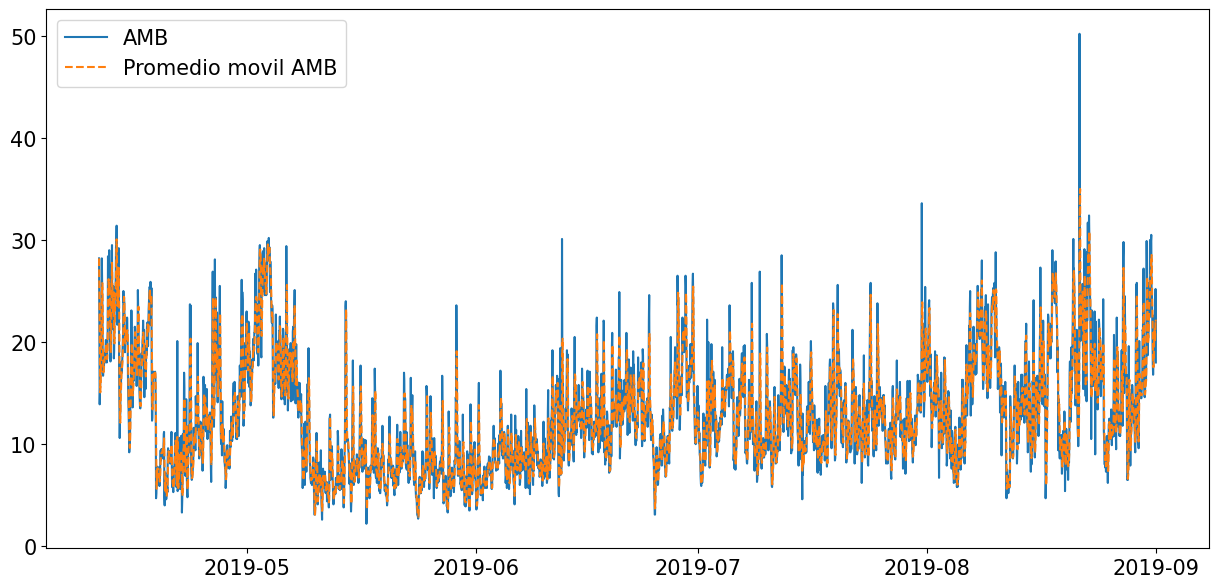

,fecha_hora_med,valor,moving average_3
396,2019-04-11 17:29:20.949,23.500000,23.500000
395,2019-04-11 18:02:49.625,22.083334,22.791667
394,2019-04-11 19:02:50.638,25.250000,23.611111
393,2019-04-11 20:03:00.961,28.749998,25.361111
392,2019-04-11 21:02:49.634,29.000000,27.666666
...,...,...,...
2606,2019-09-01 00:02:50.912,6.166667,15.444444
2605,2019-09-01 01:02:49.911,7.833333,6.972222
2604,2019-09-01 02:02:49.912,5.416667,6.472222
2603,2019-09-01 03:02:49.912,5.750000,6.333333


In [35]:
color = ['limegreen', '#bc15b0', 'indigo']
linestyle = ['-','--','-.']
plt.figure(figsize=(15,7))

#Promedio movil con la ventana = 3 y con el paso = 1
data1['moving average_3'] = data1['valor'].rolling(3,1).mean()
data['moving average_3'] = data['Medidas'].rolling(3,1).mean()

plt.plot(data['Fechas'], data['Medidas'], label='AMB')
PROMEDIO_MOVIL = plt.plot(data['Fechas'], data['moving average_3'], '--',label='Promedio movil AMB')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
data1

# Prediccion y calibracion de las medidas

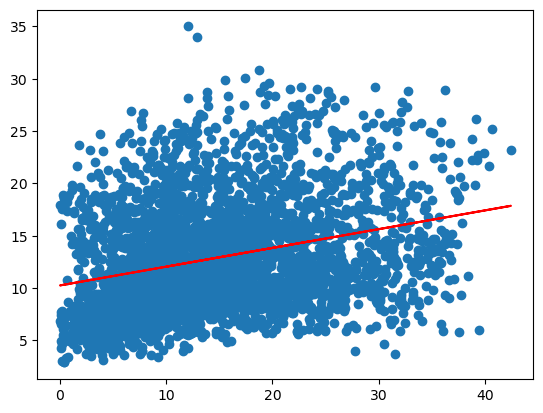

el valor tomado es 12 y el calibrado de los sensores sera:  [[12.41029805]]
Coeficientes: 
 [[0.17940478]]
Termino independiente: 
 [10.25744075]
Error cuadratico Medio: 25.46
Varianza: 0.09


In [36]:
#Funcion de calibracion

data = data[(data['Fechas'] <= ('2019-08-27 20:00:00'))]
#data1 = data1[(data1['fecha_hora_med'] <= ('2019-07-01 00:00:00'))]

X = data1['moving average_3'].values.reshape(-1, 1)
Y = data['moving average_3'].values.reshape(-1, 1)

SC_X = StandardScaler()
SC_Y = StandardScaler()

X_std = X
Y_std = Y 

slr = LinearRegression()
slr.fit(X, Y)

plt.scatter(X, Y)
plt.plot(X,slr.predict(X),color = 'RED')
plt.show()

Valor_Estacion_barata = 12
V= (np.array([Valor_Estacion_barata]).reshape(-1,1))
print('el valor tomado es 12 y el calibrado de los sensores sera: ', slr.predict(V))

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coeficientes: \n', slr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Termino independiente: \n', slr.intercept_)
# Error Cuadrado Medio
print("Error cuadratico Medio: %.2f" % mean_squared_error(Y, slr.predict(X)))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Varianza: %.2f' % r2_score(Y, slr.predict(X)))

In [37]:
#Distancia de las medidas
data = data[(data['Fechas'] <= ('2019-08-27 20:00:00'))]
distancia_AMB_BARATAS = mt.sqrt((((data['Medidas'] - data1['valor'])**2)).sum())
Distancia_AMB_Barata_conVentana = mt.sqrt((((data['moving average_3'] - data1['moving average_3'])**2)).sum())
